# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from tqdm.notebook import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

import xgboost as xgb

---

# Load data
- 32 647 observations with 17 predictors and the response column booking_status

In [2]:
# Import data
train_path = "/Users/romanakm/Desktop/Homework 1/data-science-2-2024-hw1/2024_DS2_HW1_data_train.csv"
data_train = pd.read_csv(train_path, sep = ",", decimal = ".", index_col = "Booking_ID")
test_path = "/Users/romanakm/Desktop/Homework 1/data-science-2-2024-hw1/2024_DS2_HW1_data_test.csv"
data_test = pd.read_csv(test_path, sep = ",", decimal = ".", index_col = "Booking_ID")

In [3]:
data_train.shape

(32647, 18)

In [4]:
data_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
Booking_ID,,,,,,,,,,,,,,,,,,
INN10204,NaN,NaN,NaN,2.0,Meal Plan 2,NaN,Room_Type 6,NaN,2018.0,9.0,NaN,Online,0.0,0.0,NaN,NaN,1.0,0.0
INN20020,NaN,NaN,NaN,2.0,Meal Plan 1,NaN,NaN,NaN,NaN,12.0,NaN,Online,0.0,0.0,0.0,NaN,NaN,0.0
INN16435,1.0,NaN,NaN,2.0,NaN,0.0,Room_Type 1,NaN,2018.0,11.0,NaN,NaN,0.0,0.0,NaN,NaN,1.0,0.0
INN07143,3.0,NaN,NaN,3.0,NaN,NaN,NaN,100.0,2018.0,5.0,NaN,Online,0.0,0.0,NaN,NaN,2.0,0.0
INN20511,1.0,0.0,1.0,1.0,Meal Plan 1,0.0,NaN,NaN,2018.0,11.0,NaN,NaN,0.0,0.0,0.0,150.0,NaN,1.0


In [5]:
data_train.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,28231.000000,5043.000000,7729.000000,24287.000000,17863.000000,6935.000000,29654.000000,31740.000000,5457.000000,7669.000000,32578.000000,18026.000000,9058.000000,25197.000000,32295.000000
mean,1.845312,0.103510,0.807737,2.204966,0.033645,86.213266,2017.820092,7.419817,15.523731,0.026209,0.023543,0.162155,103.601652,0.622257,0.325778
std,0.516860,0.407673,0.873931,1.411324,0.180319,85.926525,0.384118,3.062828,8.726069,0.159768,0.369300,1.790668,35.382301,0.784652,0.468672
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,18.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.750000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,59.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,127.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,121.000000,1.000000,1.000000
max,4.000000,9.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


***

# Data manipulation

## Missing values

In [44]:
# Check if there are missing values in the response variable
print(data_train.booking_status.value_counts(dropna=False))

booking_status
0.0    21774
1.0    10521
NaN      352
Name: count, dtype: int64


In [45]:
# Not many observations with missing values of response, remove them
data_train.dropna(subset = ["booking_status"], inplace = True)
print(data_train.shape)
print(data_train.booking_status.value_counts(dropna=False))

(32295, 18)
booking_status
0.0    21774
1.0    10521
Name: count, dtype: int64


## Numeric and categorical predictors

In [47]:
# Divide response and predictors
TARGET = data_train["booking_status"]
X = data_train.drop(columns=["booking_status"])

# Print the data type of response
print(TARGET.dtype)

float64


In [50]:
# Take the prediction variables columns
cols_pred = list(X.columns)

# Divide into numerical and categorical columns
cols_pred_num = [col for col in cols_pred if data_train[col].dtype != 'O']
cols_pred_cat = [col for col in cols_pred if data_train[col].dtype == 'O']

print('Numerical predictors:')
print('---------------------')
print(data_train[cols_pred_num].dtypes)
print()
print('Categorical predictors:')
print('-----------------------')
print(data_train[cols_pred_cat].dtypes)
print()
# Show levels of categorical predictions
print(data_train.type_of_meal_plan.value_counts())
print()
print(data_train.room_type_reserved.value_counts())
print()
print(data_train.market_segment_type.value_counts())

Numerical predictors:
---------------------
no_of_adults                            float64
no_of_children                          float64
no_of_weekend_nights                    float64
no_of_week_nights                       float64
required_car_parking_space              float64
lead_time                               float64
arrival_year                            float64
arrival_month                           float64
arrival_date                            float64
repeated_guest                          float64
no_of_previous_cancellations            float64
no_of_previous_bookings_not_canceled    float64
avg_price_per_room                      float64
no_of_special_requests                  float64
dtype: object

Categorical predictors:
-----------------------
type_of_meal_plan      object
room_type_reserved     object
market_segment_type    object
dtype: object

type_of_meal_plan
Meal Plan 1     12636
Not Selected     2262
Meal Plan 2      1464
Meal Plan 3         3
Name: coun

## One-hot encoding of categorical variables

In [51]:
# Convert categorical variables to one-hot encoding
X = pd.get_dummies(X, columns=cols_pred_cat)
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
Booking_ID,,,,,,,,,,,,,,,,,,,,,
INN10204,NaN,NaN,NaN,2.0,NaN,NaN,2018.0,9.0,NaN,0.0,...,False,False,False,True,False,False,False,False,False,True
INN20020,NaN,NaN,NaN,2.0,NaN,NaN,NaN,12.0,NaN,0.0,...,False,False,False,False,False,False,False,False,False,True
INN16435,1.0,NaN,NaN,2.0,0.0,NaN,2018.0,11.0,NaN,0.0,...,False,False,False,False,False,False,False,False,False,False
INN07143,3.0,NaN,NaN,3.0,NaN,100.0,2018.0,5.0,NaN,0.0,...,False,False,False,False,False,False,False,False,False,True
INN20511,1.0,0.0,1.0,1.0,0.0,NaN,2018.0,11.0,NaN,0.0,...,False,False,False,False,False,False,False,False,False,False


## Train test split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, TARGET, test_size=0.2, random_state=27, stratify=TARGET)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=27, stratify=y_train)

---

# XGBoost

## First XGBoost

In [96]:
# Define hyperparameters
booster_sklearn = xgb.XGBClassifier(
    max_depth = 6,
    objective = "binary:logistic",
    eval_metric = "auc",
    use_label_encoder = False,
    early_stopping_rounds = 10,
    random_state = 12
)

booster_sklearn.fit(
    X_train,
    y_train,
    eval_set = [(X_train, y_train), (X_test, y_test), (X_valid, y_valid)],
    verbose = True
)

[0]	validation_0-auc:0.75968	validation_1-auc:0.73898	validation_2-auc:0.73486
[1]	validation_0-auc:0.78031	validation_1-auc:0.76078	validation_2-auc:0.75756
[2]	validation_0-auc:0.78597	validation_1-auc:0.76654	validation_2-auc:0.76186
[3]	validation_0-auc:0.79983	validation_1-auc:0.77461	validation_2-auc:0.77336
[4]	validation_0-auc:0.80717	validation_1-auc:0.78041	validation_2-auc:0.77805
[5]	validation_0-auc:0.81052	validation_1-auc:0.78292	validation_2-auc:0.78117
[6]	validation_0-auc:0.81534	validation_1-auc:0.78699	validation_2-auc:0.78530
[7]	validation_0-auc:0.81832	validation_1-auc:0.79021	validation_2-auc:0.78804
[8]	validation_0-auc:0.82141	validation_1-auc:0.79202	validation_2-auc:0.78915
[9]	validation_0-auc:0.82351	validation_1-auc:0.79369	validation_2-auc:0.79089
[10]	validation_0-auc:0.82638	validation_1-auc:0.79605	validation_2-auc:0.79250
[11]	validation_0-auc:0.82698	validation_1-auc:0.79646	validation_2-auc:0.79317
[12]	validation_0-auc:0.82808	validation_1-auc:0.7

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=12, ...)

## Plot the training process

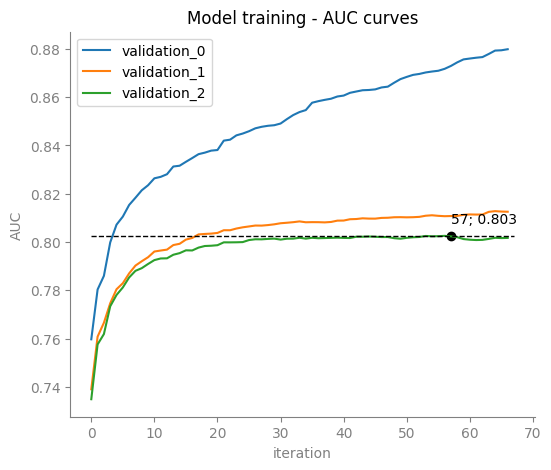

In [97]:
results = booster_sklearn.evals_result()
epochs = len(results['validation_0']['auc'])
x_axis = range(0, epochs)

fig, ax = plt.subplots(figsize=(6, 5))
for sample, vals in results.items():
    ax.plot(
        x_axis,
        vals['auc'],
        label=sample
    )
best_score = max(results['validation_2']['auc'])
best_iteration = np.argmax(results['validation_2']['auc']) + 1

ax.plot([0, epochs], [best_score, best_score], color='black', ls='--', lw=1)
ax.scatter([best_iteration], [best_score], color='black')
ax.annotate(
    f'{best_iteration}; {best_score:.3f}',
    xy=(best_iteration, best_score),
    xytext=(best_iteration, best_score + 0.005),
)

ax.set_xlabel('iteration', color='gray')
ax.set_ylabel('AUC', color='gray')
ax.legend(loc='best')
ax.set_title('Model training - AUC curves')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.tick_params(axis='y', colors='gray')
ax.tick_params(axis='x', colors='gray')

## Prediction accuracy

In [98]:
y_pred_prob = booster_sklearn.predict_proba(X_test)[:, 1]
y_pred = np.round(y_pred_prob)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 76.82%
              precision    recall  f1-score   support

         0.0       0.79      0.89      0.84      4355
         1.0       0.70      0.51      0.59      2104

    accuracy                           0.77      6459
   macro avg       0.74      0.70      0.71      6459
weighted avg       0.76      0.77      0.76      6459

[[3886  469]
 [1028 1076]]


## Predictor importance

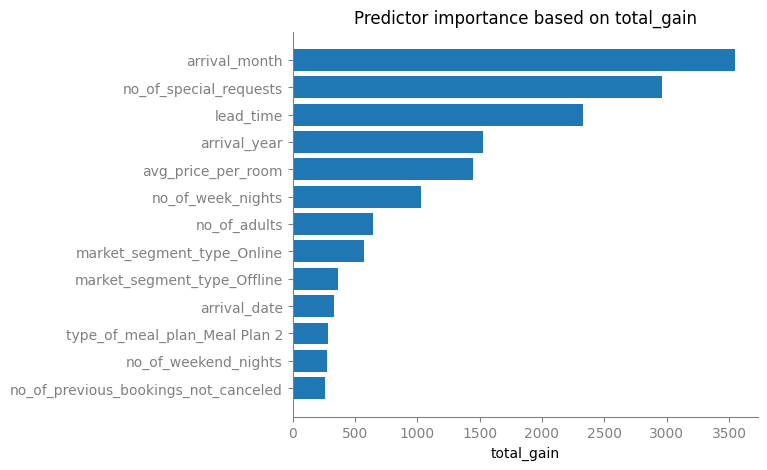

In [99]:
# Predictor importance based on 'total_gain'
importance_type = 'total_gain'
importance = booster_sklearn.get_booster().get_score(importance_type=importance_type)
predictor_strength = sorted([(k, v) for k, v in importance.items()], key=lambda x: x[1], reverse=True)
predictor_strength = pd.DataFrame(predictor_strength, columns=['predictor', 'strength'])

# Plot predictor importance
fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1)

n_strongest = 13
ax.barh(range(n_strongest, 0, -1), predictor_strength['strength'].iloc[:n_strongest])
ax.set_yticks(range(n_strongest, 0, -1))
ax.set_yticklabels(predictor_strength['predictor'].iloc[:n_strongest])
ax.set_xlabel(importance_type)
ax.set_title('Predictor importance based on total_gain')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.tick_params(axis='y', colors='gray')
ax.tick_params(axis='x', colors='gray')

plt.show()

## XGBoost with the most important predictors

In [100]:
# Select 5 most important predictors
cols_select = ["arrival_month", "no_of_special_requests", "lead_time", "avg_price_per_room", "no_of_week_nights"]
booster_sklearn = xgb.XGBClassifier(
    max_depth = 6,
    objective = "binary:logistic",
    eval_metric = "auc",
    use_label_encoder = False,
    early_stopping_rounds = 10,
    random_state = 12
)

booster_sklearn.fit(
    X_train[cols_select],
    y_train,
    eval_set = [(X_train[cols_select], y_train), (X_test[cols_select], y_test), (X_valid[cols_select], y_valid)],
    verbose = True
)

[0]	validation_0-auc:0.71692	validation_1-auc:0.69588	validation_2-auc:0.68235
[1]	validation_0-auc:0.74565	validation_1-auc:0.72165	validation_2-auc:0.71402
[2]	validation_0-auc:0.75173	validation_1-auc:0.72616	validation_2-auc:0.71792
[3]	validation_0-auc:0.75459	validation_1-auc:0.72786	validation_2-auc:0.71932
[4]	validation_0-auc:0.75984	validation_1-auc:0.73163	validation_2-auc:0.72191
[5]	validation_0-auc:0.76280	validation_1-auc:0.73457	validation_2-auc:0.72419
[6]	validation_0-auc:0.76447	validation_1-auc:0.73619	validation_2-auc:0.72516
[7]	validation_0-auc:0.76623	validation_1-auc:0.73668	validation_2-auc:0.72571
[8]	validation_0-auc:0.76940	validation_1-auc:0.74001	validation_2-auc:0.72788
[9]	validation_0-auc:0.77141	validation_1-auc:0.74053	validation_2-auc:0.72973
[10]	validation_0-auc:0.77218	validation_1-auc:0.74098	validation_2-auc:0.73030
[11]	validation_0-auc:0.77241	validation_1-auc:0.74134	validation_2-auc:0.73075
[12]	validation_0-auc:0.77536	validation_1-auc:0.7

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=12, ...)

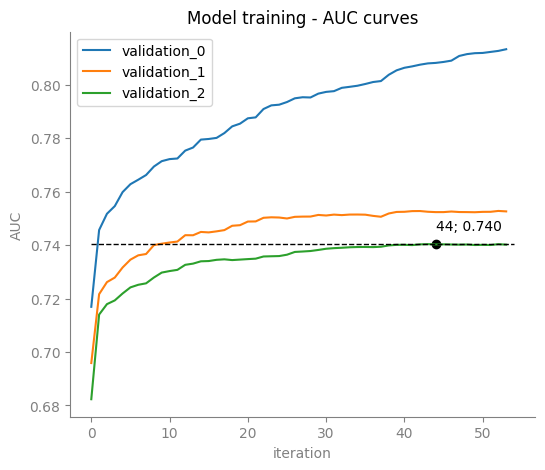

In [101]:
results = booster_sklearn.evals_result()
epochs = len(results['validation_0']['auc'])
x_axis = range(0, epochs)

fig, ax = plt.subplots(figsize=(6, 5))
for sample, vals in results.items():
    ax.plot(
        x_axis,
        vals['auc'],
        label=sample
    )
best_score = max(results['validation_2']['auc'])
best_iteration = np.argmax(results['validation_2']['auc']) + 1

ax.plot([0, epochs], [best_score, best_score], color='black', ls='--', lw=1)
ax.scatter([best_iteration], [best_score], color='black')
ax.annotate(
    f'{best_iteration}; {best_score:.3f}',
    xy=(best_iteration, best_score),
    xytext=(best_iteration, best_score + 0.005),
)

ax.set_xlabel('iteration', color='gray')
ax.set_ylabel('AUC', color='gray')
ax.legend(loc='best')
ax.set_title('Model training - AUC curves')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.tick_params(axis='y', colors='gray')
ax.tick_params(axis='x', colors='gray')